In [83]:
import pandas as pd
import plotly.express as px
import os
import datetime
from dateutil.relativedelta import relativedelta
import calendar

import plotly.io as pio
#https://www.geeksforgeeks.org/python-plotly-exporting-to-static-images/

In [84]:
is_py=False

In [85]:
# 31Dec21 - 22May22  (last day of prev month - current date)
# Export data from amibroker as format  D:\AB_DB\AB-Template & Explore\TopN_ROC_XPeriod.apx  
# Ticker,Date/Time,open,high,low,close,name,volume
# AVAX,31/12/2021 00:00:00,101.75,111.99,100.13,109.43,,2472910.50
# AVAX,1/1/2022 00:00:00,109.43,114.50,108.42,114.13,,1211128.00

#Amibroker script 
# Filter=1; 
# AddColumn(O,"open"); 
# AddColumn(H,"high"); 
# AddColumn(L,"low"); 
# AddColumn(C,"close"); 
# AddTextColumn(FullName(),"name");
# AddColumn(V,"volume"); 



In [86]:
# root_path=r'D:\JupyterCode\MyQuantFinProject\Data\ThaiFund\TH_All'
root_path=r'D:\JupyterCode\MyQuantFinProject\Data'
file_name='AsiaFund.csv'
title="asia-fund"  

#6AsiaFund  6RegionFund  7SectorFund 6MyCrypto   5Thai  5SmallThai

result_path='D:\JupyterCode\MyQuantFinProject\Report'

# since the end calculate since x 
to_month_str='2022-05'

# Whick time frame   and look past in the past x month
timeframe='M'
past_month=10

#timeframe='W'
#past_week=8

required_fullname=False

today=datetime.datetime.today()
print(today)




2022-05-23 22:23:54.521383


#Enter data

if is_py:
    print("Enter Timeframe (m or w)")
    timeframe = input("Enter TimeFrame : ")
    timeframe=timeframe.upper()

    print("Enter To Date asY-m (2022-03)")
    end_param = input("Enter end : ")



    try:
        start_dt=datetime.strptime(start, "%Y.%m.%d")
        end_dt=datetime.strptime(end,"%Y.%m.%d")
        if start_dt>=end_dt:
           raise Exception(f"Error : {start_dt} can't be greater or equal to {end_dt}")
    except Exception as ex:
        raise ex



    print(f"Do you want to retrive data from {start_dt} to {end_dt} ?")
    press_y=input(f"Press y=True and n=False : ") 
    if press_y.lower()=='y':
     ok=True
    else:
     exit()
else: 
    start='2017.01.01'
    end= today_now.strftime("%Y.%m.%d")
    
print(f"{start} - {end}")

In [87]:
split_end_to=to_month_str.split('-')
range_month=calendar.monthrange(int(split_end_to[0]), int(split_end_to[1]))

to_month_firstDate=datetime.datetime( int(split_end_to[0]), int(split_end_to[1]) ,range_month[0] )
to_month_lastDate=datetime.datetime( int(split_end_to[0]), int(split_end_to[1]) ,range_month[1] )

print(to_month_firstDate)
print(to_month_lastDate)

2022-05-06 00:00:00
2022-05-31 00:00:00


In [88]:
to_month_firstDate

datetime.datetime(2022, 5, 6, 0, 0)

In [89]:
if timeframe=='M':
    from_month=to_month_firstDate  + relativedelta(months=-past_month)
    from_month_str=from_month.strftime('%Y-%m')
    
    to_month_str=to_month_firstDate.strftime('%Y-%m')
    
    
elif timeframe=='W':
    if today<to_month_lastDate:
      from_month=today  + relativedelta(weeks=-(past_week+1))
      to_month_str=today.strftime('%Y-%m-%d')
    else: 
      from_month=to_month_lastDate  + relativedelta(weeks=-past_week)  
      to_month_str=to_month_lastDate.strftime('%Y-%m-%d')
    
    from_month_str=from_month.strftime('%Y-%m-%d')
     

print(f"look back in the  { past_month }+1(Including current month)  {timeframe } : {from_month_str} - {to_month_str}")   

look back in the  10+1(Including current month)  M : 2021-07 - 2022-05


In [90]:
# create directory
folder_report=f'{title}_{timeframe }_{from_month_str}_{to_month_str}'
report_path=result_path+"\\"+folder_report

try:  
 if not os.path.exists(report_path):
     os.mkdir(report_path) 
     print(report_path)   
     
except OSError as error:  
    raise error

D:\JupyterCode\MyQuantFinProject\Report\asia-fund_M_2021-07_2022-05


In [91]:
dfAll=pd.read_csv(f'{root_path}\\{file_name}',index_col='Date/Time',parse_dates=['Date/Time'],dayfirst=True)
# dfAll=pd.read_csv(f'{root_path}\\{file_name}',index_col='Date/Time')
dfAll.index.rename('datetime',inplace=True)

In [92]:


df=dfAll.loc[from_month_str:to_month_str,:]

df.rename(columns={'Ticker':'symbol'},inplace=True)


if required_fullname==True: 
 df=df[['symbol','name','close']]   
 df['symbol'] = df.apply( lambda x: f'{x["symbol"]} {x["name"]}'  , axis=1) 
else:
 df=df[['symbol','close']]   
    

print(df.info())

if  df.empty:
    print("No data according to your timeframe.")
    print("The belows is last record.")
    print( dfAll.iloc[len(dfAll)-1,:])
    exit()
    
else:   
    dfAll=None
    
print(df.head())
print(df.tail())



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 575 entries, 2021-12-31 to 2022-05-20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   symbol  575 non-null    object 
 1   close   575 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.5+ KB
None
             symbol  close
datetime                  
2021-12-31  2822.HK  17.79
2022-01-03  2822.HK  17.92
2022-01-04  2822.HK  17.78
2022-01-05  2822.HK  17.74
2022-01-06  2822.HK  17.49
           symbol  close
datetime                
2022-05-16    EEM  40.33
2022-05-17    EEM  41.32
2022-05-18    EEM  40.33
2022-05-19    EEM  40.97
2022-05-20    EEM  41.14


C:\Users\pongthsa\AppData\Local\Temp\ipykernel_5168\569249442.py:1: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



In [93]:
last_record=df.index[len(df)-1]
last_record_str=last_record.strftime('%d-%m-%Y')
print("Last Day : ",last_record_str)


list_symbol=df['symbol'].unique().tolist()
print(list_symbol)

# list_symbol=['AVAX','ETH','SOL']

df_Monthly_Price=pd.DataFrame(columns=['symbol','month-year','pct_change'])

Last Day :  20-05-2022
['2822.HK', '82823.HK', 'AAXJ', 'ASEA', 'CN', 'EEM']


In [94]:
for symbol in list_symbol:
    
    dfx_symbol=df.query('symbol==@symbol')
    
    dfx_month = dfx_symbol.resample(timeframe).last()
    dfx_month=dfx_month .reset_index()
    
    dfx_month['pct_change']=dfx_month['close'].pct_change()*100
    dfx_month['pct_change']=dfx_month['pct_change'].round(1)

    if timeframe=='M':
     dfx_month['month-year']=dfx_month['datetime'].apply( lambda x: x.strftime('%m-%Y') )
    elif timeframe=='W':
     dfx_month['month-year']=dfx_month['datetime'].apply( lambda x: x.strftime('%d-%m-%Y') )  
     dfx_month.loc[len(dfx_month)-1,'month-year']=last_record_str
        

    dfx_month=dfx_month[['symbol','month-year','close','pct_change']]
    
    dfx_month=dfx_month.dropna()
    dfx_month=dfx_month.drop(columns=['close'])
    
    
    df_Monthly_Price=pd.concat([df_Monthly_Price, dfx_month], ignore_index=True)
    
    print(dfx_month)
    


    symbol month-year  pct_change
1  2822.HK    01-2022        -5.6
2  2822.HK    02-2022         0.7
3  2822.HK    03-2022        -7.2
4  2822.HK    04-2022        -5.5
5  2822.HK    05-2022        -1.3
     symbol month-year  pct_change
1  82823.HK    01-2022        -5.6
2  82823.HK    02-2022        -0.4
3  82823.HK    03-2022        -6.6
4  82823.HK    04-2022        -1.5
5  82823.HK    05-2022        -0.2
  symbol month-year  pct_change
1   AAXJ    01-2022        -1.3
2   AAXJ    02-2022        -3.7
3   AAXJ    03-2022        -4.6
4   AAXJ    04-2022        -5.5
5   AAXJ    05-2022        -2.2
  symbol month-year  pct_change
1   ASEA    01-2022         3.7
2   ASEA    02-2022         3.1
3   ASEA    03-2022         1.4
4   ASEA    04-2022        -2.7
5   ASEA    05-2022        -3.3
  symbol month-year  pct_change
1     CN    01-2022        -3.7
2     CN    02-2022        -2.7
3     CN    03-2022        -9.6
4     CN    04-2022        -6.8
5     CN    05-2022         0.2
  symbol m

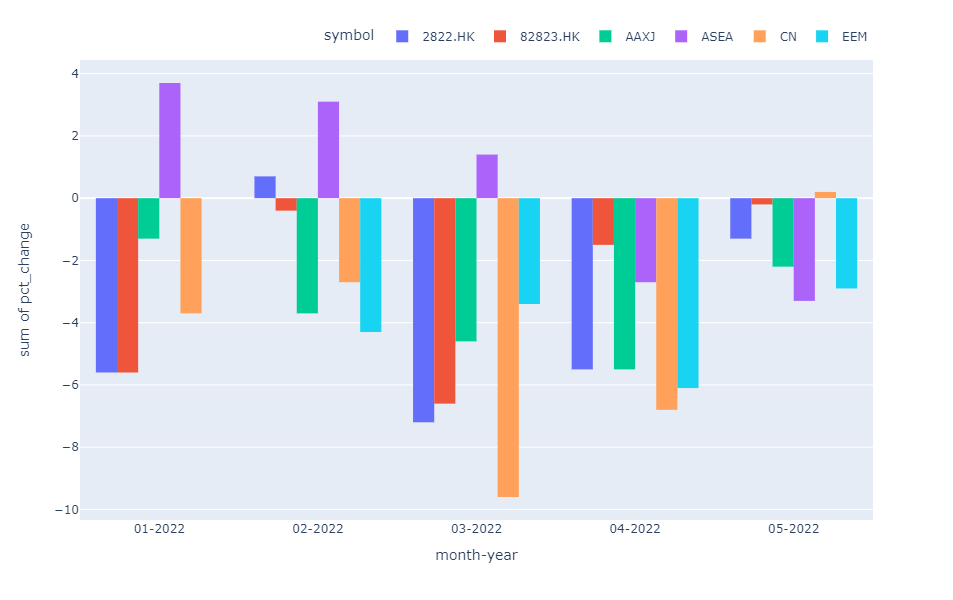

In [95]:
chart_title='pct_change'
fig = px.histogram(df_Monthly_Price, x="month-year", y="pct_change",
             color='symbol', barmode='group',height=600)

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.show()

pio.write_image(fig, f"{report_path}\\{title}-{chart_title}.png")


In [96]:
df_Monthly_Price['is-gain']=df_Monthly_Price.apply(lambda x: 1 if x['pct_change']>0 else 0 ,axis=1)
df_Monthly_Price.head()

,symbol,month-year,pct_change,is-gain
0,2822.HK,01-2022,-5.6,0
1,2822.HK,02-2022,0.7,1
2,2822.HK,03-2022,-7.2,0
3,2822.HK,04-2022,-5.5,0
4,2822.HK,05-2022,-1.3,0


In [97]:
df_Monthly_Count=df_Monthly_Price.groupby(['month-year','is-gain'],as_index=False).size()
df_Monthly_Count.rename(columns={'size':'count'},inplace=True)
df_Monthly_Count.tail()

,month-year,is-gain,count
4,03-2022,0,5
5,03-2022,1,1
6,04-2022,0,6
7,05-2022,0,5
8,05-2022,1,1


In [98]:
if timeframe=='M':
 df_Monthly_Count['month-year'] = pd.to_datetime(df_Monthly_Count['month-year'], format='%m-%Y')
elif timeframe=='W':
 df_Monthly_Count['month-year'] = pd.to_datetime(df_Monthly_Count['month-year'], format='%d-%m-%Y')   


df_Monthly_Count=df_Monthly_Count.sort_values(['month-year'])



if timeframe=='M':
 df_Monthly_Count['month-year']=df_Monthly_Count['month-year'].apply( lambda x: x.strftime('%m-%Y') )
elif timeframe=='W':
 df_Monthly_Count['month-year']=df_Monthly_Count['month-year'].apply( lambda x: x.strftime('%d-%m-%Y') )  
df_Monthly_Count

,month-year,is-gain,count
0,01-2022,0,5
1,01-2022,1,1
2,02-2022,0,4
3,02-2022,1,2
4,03-2022,0,5
5,03-2022,1,1
6,04-2022,0,6
7,05-2022,0,5
8,05-2022,1,1


In [99]:
df_Monthly_Count=df_Monthly_Count.reset_index(drop=True)
df_Monthly_Count.reset_index()
df_Monthly_Count

,month-year,is-gain,count
0,01-2022,0,5
1,01-2022,1,1
2,02-2022,0,4
3,02-2022,1,2
4,03-2022,0,5
5,03-2022,1,1
6,04-2022,0,6
7,05-2022,0,5
8,05-2022,1,1


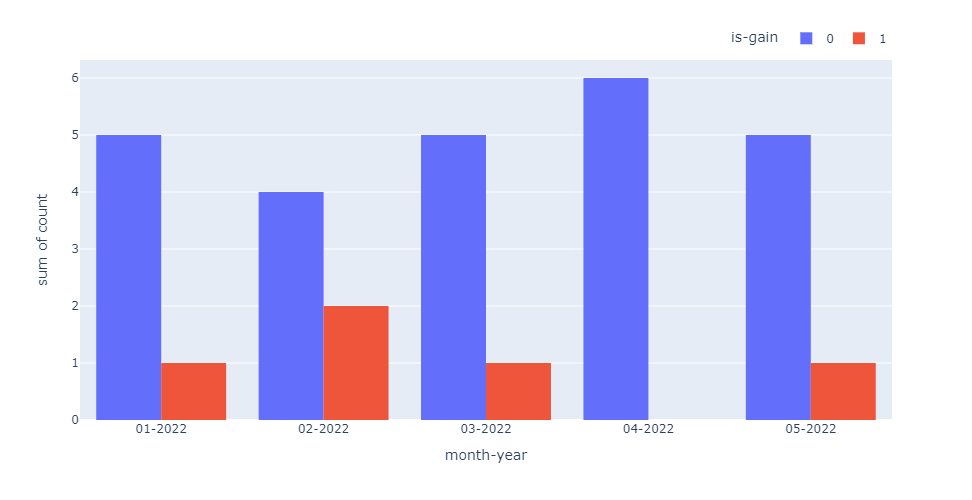

In [100]:
chart_title="gain-lose"

fig = px.histogram(df_Monthly_Count, x="month-year", y="count",
             color='is-gain', barmode='group',height=500)

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.show()

pio.write_image(fig, f"{report_path}\\{title}-{chart_title}.png")